In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep = ';',  encoding= 'latin1')
df = df.loc[(df['ano']>=2004) & (df['ano'] < 2025)]
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 34007 entries, 1526 to 35532
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cisp                        34007 non-null  int64  
 1   mes                         34007 non-null  int64  
 2   ano                         34007 non-null  int64  
 3   mes_ano                     34007 non-null  object 
 4   aisp                        34007 non-null  int64  
 5   risp                        34007 non-null  int64  
 6   munic                       34007 non-null  object 
 7   mcirc                       34007 non-null  int64  
 8   regiao                      34007 non-null  object 
 9   hom_doloso                  34007 non-null  int64  
 10  lesao_corp_morte            34007 non-null  int64  
 11  latrocinio                  34007 non-null  int64  
 12  cvli                        34007 non-null  int64  
 13  hom_por_interv_policial     34007

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
1526,1,1,2004,2004m01,5,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,14,3,0,0,0,0,637,3
1527,4,1,2004,2004m01,5,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,32,3,1,0,0,0,447,3
1528,5,1,2004,2004m01,13,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,64,4,1,0,0,0,699,3
1529,6,1,2004,2004m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,36,2,3,0,0,0,455,3
1530,7,1,2004,2004m01,1,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,11,0,3,4,0,0,143,3


In [20]:
#Analisar a evolução dos registros de estelionato na cidade do Rio de Janeiro.
df_RJ = df.loc[(df['munic'] == 'Rio de Janeiro')]
df_RJ = df.loc[(df['munic'] == 'Rio de Janeiro')]
df_estl = df_RJ.groupby(['ano'])['estelionato'].sum().reset_index()
df_estl = df_estl.sort_values(by = 'ano').reset_index()
df_estl

,index,ano,estelionato
0,0,2004,7727
1,1,2005,9101
2,2,2006,11020
3,3,2007,13319
4,4,2008,13589
5,5,2009,12520
6,6,2010,14292
7,7,2011,17574
8,8,2012,19589
9,9,2013,21093


In [21]:
df_estl['ano']=df_estl['ano'].astype(str)

In [22]:
df_array_estl = np.array(df_estl['estelionato'])

In [23]:
media_estl = np.mean(df_array_estl)
media_estl


np.float64(25548.714285714286)

In [24]:
mediana_estl = np.median(df_array_estl)
mediana_estl

np.float64(20073.0)

In [25]:
distancia = (media_estl - mediana_estl)/mediana_estl
distancia


np.float64(0.2727900306737551)

In [26]:
print(f"MÉDIA = {media_estl:.2f}\nMEDIANA = {mediana_estl:.2f}\nDISTÂNCIA = {distancia:.2f}")

MÉDIA = 25548.71
MEDIANA = 20073.00
DISTÂNCIA = 0.27


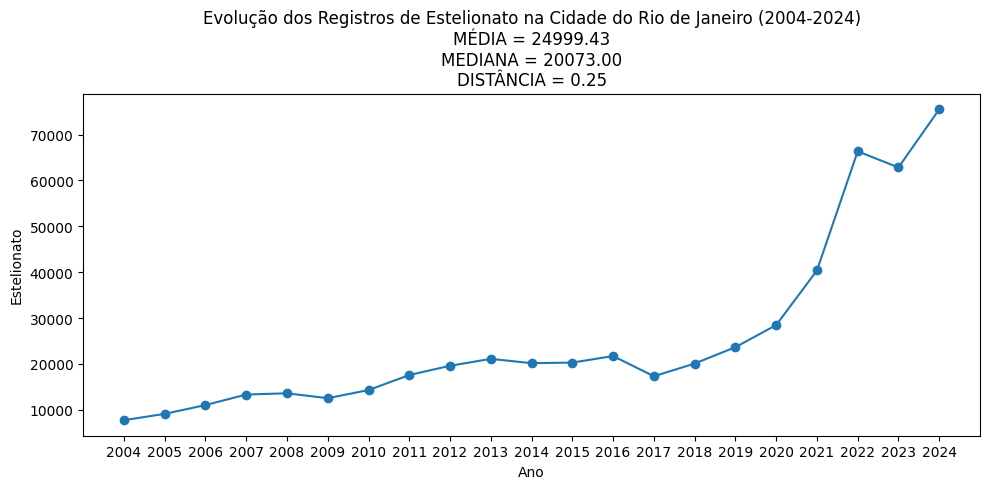

In [34]:
plt.figure(figsize=(10,5))
plt.plot(df_estl['ano'], df_estl['estelionato'], marker='o', linestyle='-')

plt.title('Evolução dos Registros de Estelionato na Cidade do Rio de Janeiro (2004-2024)\nMÉDIA = 24999.43\nMEDIANA = 20073.00\nDISTÂNCIA = 0.25')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
#plt.grid(True) #Não é recomendado utilizar Grids para visualizaçõa de dados
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

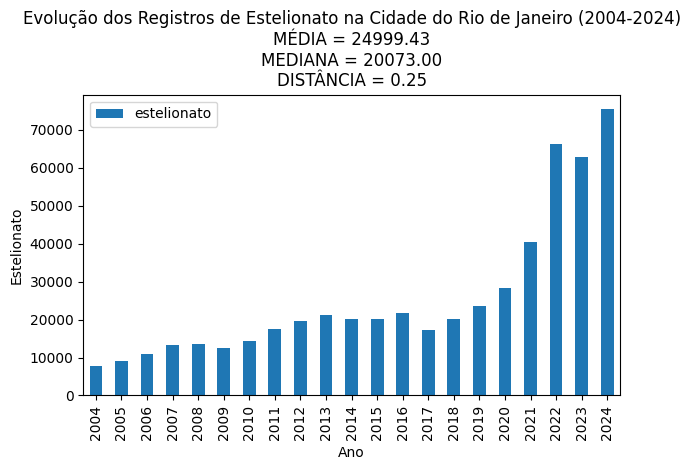

In [35]:
plt.figure(figsize=(10,5))
df_estl.plot(kind='bar' , x= 'ano', y= 'estelionato')
plt.title('Evolução dos Registros de Estelionato na Cidade do Rio de Janeiro (2004-2024)\nMÉDIA = 24999.43\nMEDIANA = 20073.00\nDISTÂNCIA = 0.25')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
plt.tight_layout()
plt.show()

In [29]:
df_dlg = df_RJ.groupby(['cisp'])['estelionato'].sum().reset_index()
df_dlg = df_dlg.sort_values(by = 'estelionato').reset_index()
df_dlg

,index,cisp,estelionato
0,41,45,98
1,7,11,1144
2,4,7,1877
3,39,43,5125
4,40,44,5756
5,27,31,5859
6,36,40,5939
7,13,17,6130
8,1,4,6552
9,21,25,6588


In [30]:
df_array_del = np.array(df_dlg['estelionato'])

q1 = np.percentile(df_dlg, 25)
q2 = np.percentile(df_dlg, 50)
q3 = np.percentile(df_dlg, 75)

In [31]:
print(f"Q1={q1}\nQ2={q2}\nQ3={q3}")

Q1=17.25
Q2=33.0
Q3=6725.25


In [32]:
df_dlg_q3 = df_dlg.loc[(df_dlg['estelionato'] >= q3 )]

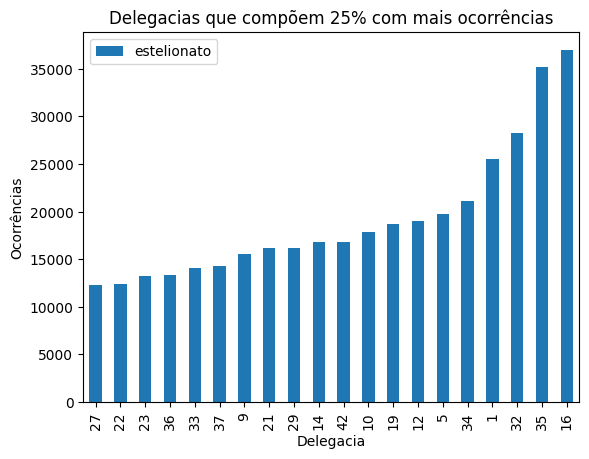

In [48]:
df_dlg_q3.tail(20).plot(kind='bar' , x= 'cisp', y= 'estelionato')
plt.xlabel('Delegacias por jurisdição')
plt.ylabel('Ocorrências')
plt.title('Delegacias que compõem 25% com mais ocorrências')
plt.show()

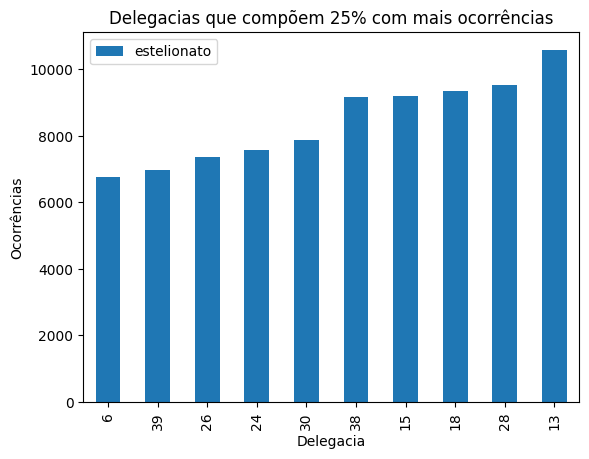

In [49]:
df_dlg_q3.head(10).plot(kind='bar' , x= 'cisp', y= 'estelionato')
plt.xlabel('Delegacia')
plt.ylabel('Ocorrências')
plt.title('Delegacias que compõem 25% com mais ocorrências')
plt.show()